Maximum Influence Flow from A to F: 15


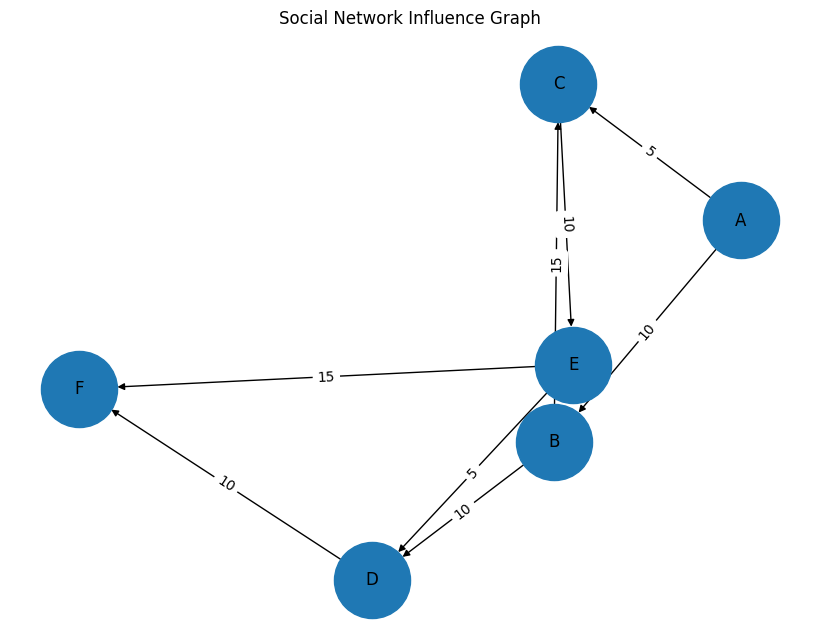

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# BFS function: Used to find an augmenting path

# This BFS runs on the "residual graph" to check if there exists any path from source → sink with available capacity.
# If such a path exists, we also store the path using `parent`.
def bfs(residual_graph, source, sink, parent):

    visited = set()           # Keep track of visited nodes
    queue = deque([source])   # Standard BFS queue
    visited.add(source)

    while queue:
        u = queue.popleft()

        # Explore all neighbors of current node 'u'
        for v in residual_graph[u]:

            # If NOT visited n there is some capacity left
            if v not in visited and residual_graph[u][v] > 0:
                queue.append(v)
                visited.add(v)
                parent[v] = u   # Store the path

                # If we reached the sink, no need to continue BFS
                if v == sink:
                    return True

    return False   # No augmenting path found


# Edmonds-Karp Algorithm (Ford-Fulkerson using BFS)

# This algorithm keeps finding augmenting paths using BFS.
# For each path, it sends the maximum possible flow (bottleneck capacity). It repeats until no more augmenting paths exist.
def edmonds_karp(graph, source, sink):

    # We create a residual graph which will keep changing
    residual = {u: dict(v) for u, v in graph.items()}

    parent = {}       # To store the path returned by BFS
    max_flow = 0      # Final answer

    # Keep running BFS until no more augmenting paths
    while bfs(residual, source, sink, parent):

        # Step 1: Find the minimum capacity in the found path
        path_flow = float("inf")
        v = sink

        # Move backwards from sink to source using parent[]
        while v != source:
            u = parent[v]
            path_flow = min(path_flow, residual[u][v])
            v = u

        # Add this flow to the final max flow
        max_flow += path_flow

        # Step 2: Update the residual capacities
        v = sink
        while v != source:
            u = parent[v]

            # Reduce the forward edge capacity
            residual[u][v] -= path_flow

            # Add capacity to the reverse edge (for possible backflow)
            residual.setdefault(v, {})
            residual[v][u] = residual[v].get(u, 0) + path_flow

            v = u

    return max_flow


# Example Social Network Graph
# Each node represents a person.Each edge capacity shows how much "influence" can be passed.
graph = {
    'A': {'B': 10, 'C': 5},
    'B': {'C': 15, 'D': 10},
    'C': {'E': 10},
    'E': {'D': 5, 'F': 15},
    'D': {'F': 10},
    'F': {}
}

source = 'A'   # Starting point of influence
sink = 'F'     # Target person
result = edmonds_karp(graph, source, sink)
print("Maximum Influence Flow from A to F:", result)


# Visualization using NetworkX

G = nx.DiGraph()

for u in graph:
    for v in graph[u]:
        G.add_edge(u, v, capacity=graph[u][v])

# Spring layout makes the graph look neat and spaced properly
pos = nx.spring_layout(G)

plt.figure(figsize=(8, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,
    font_size=12,
    arrows=True
)

# Draw capacity labels on edges
edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Social Network Influence Graph")
plt.savefig("example_graph.png")  # Saves the graph for README
plt.show()
